# Tutorial for Reading Real PDB and Generating Inputs for NERDSS

## 1. Introduction

This function enables users to read a real PDB file and extract the coordinate information stored inside, and generate NERDSS-readable input files (.mol and .inp files). The functions introduced in this tutorial is a series of step-by-step seperate functions that can be used in Jupyter Notebook. For another version with user's interface, please refer to 'ioNERDSSUserGuide.doc' in the same repository.

## 2. Functions

Import package 'ioNERDSS' that contains all analytical functions.

In [ ]:
import ioNERDSS as io

For all the input requirements of all the functions below, please refer to the 'ioNERDSSUserGuide'.

### 2.1 Reading PDB File

This function will extract the coordinate information stored inside a real PDB file and calculate the COM of each unique chain, as well as recognize the binding information between each pair of chains (all atoms of different unique chains that are closer that 3.0 angstroms are considered as binded), including whether two chains are binded and the coordinates of each binding interface. All the information will be printed on the screen and the returns will contain all the information for further analysis.

In [2]:
result1 = io.real_PDB_separate_read(FileName='1utc.pdb')

Finish reading pdb file
4 chain(s) in total: ['A', 'B', 'P', 'Q']
Each of them has [2754, 2763, 66, 66] atoms.
Center of mass of  A is: [0.975, 5.018, 3.545]
Center of mass of  B is: [4.214, 6.886, 2.019]
Center of mass of  P is: [2.635, 5.307, 3.115]
Center of mass of  Q is: [2.555, 6.419, 2.222]
Interaction site of A & B is: [1.752, 6.239, 2.643] and [2.223, 6.546, 2.559] distance between interaction sites is: 0.568 nm
Interaction site of A & P is: [2.096, 5.612, 3.193] and [2.417, 5.159, 3.148] distance between interaction sites is: 0.557 nm
Interaction site of A & Q is: [1.831, 5.940, 1.576] and [2.400, 6.433, 1.890] distance between interaction sites is: 0.815 nm
Interaction site of B & P is: [3.350, 5.290, 2.839] and [2.856, 5.318, 3.063] distance between interaction sites is: 0.544 nm
Interaction site of B & Q is: [3.064, 6.419, 1.962] and [2.619, 6.526, 2.028] distance between interaction sites is: 0.463 nm


### 2.2 Filtration of Chains (Optional)

This function will filter the desired chain according to the input list of chain and exclude all the unnecessary coordinate information for future analysis. Here, only chain A and B are being remaind so that the number of remaining interaction site will be only one. The code below will only show the way to call and use this function, however, the filtered result will not be used for future analysis. 

In [11]:
result_filtered = io.real_PDB_separate_filter(Result=result1, ChainList = ['A', 'B', 'P'])

After filter with ['A', 'B', 'P'] :
3 chain(s) in total: ['A', 'B', 'P']
Center of mass of  A is: [0.000, 0.000, 0.000]
Center of mass of  B is: [0.000, 0.000, 0.000]
Center of mass of  P is: [0.000, 0.000, 0.000]
Interaction site of A & B is: [1.752, 6.239, 2.643] and [2.223, 6.546, 2.559] distance between interaction sites is: 0.568 nm
Interaction site of A & P is: [2.096, 5.612, 3.193] and [2.417, 5.159, 3.148] distance between interaction sites is: 0.557 nm
Interaction site of A & Q is: [1.831, 5.940, 1.576] and [2.400, 6.433, 1.890] distance between interaction sites is: 0.815 nm


### 2.3 Visualizing Model (Optional) 

#### 2.3.1 Generating New PDB FIle

This function will generate a PDB file that only contains the calculated COMs and reaction interfaces for visualization and comparison with the original PDB file. The input will be the returns of the previous function.

Note: The unit for the coordinates in PDB file is in Angstrom but not nm, so the value will be 10 times larger than that in NERDSS input files.

In [4]:
io.real_PDB_show_PDB(Result=result1)

PDB writing complete! (named as show_structure.pdb)


0

#### 2.3.2 Generating 3D Plot 

This function will generate a 3D plot indicaiting the spacial geometry of each simplified chain. The solid lines of different colors are connecting the COM with interfaces within each chain; the black dotted line are connecting each pair of interfaces and the COMs are shown as solid points with their names above. To interact with the plot, other IDEs rather than Jupyter Notebook (such as VSCode) are recommended.

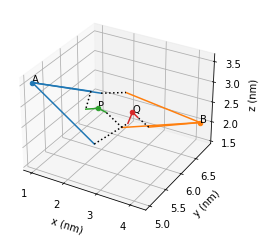

0

In [5]:
io.real_PDB_show_3D(Result=result1)

### 2.4 Changing Sigma 

This function allows users to change the value of sigma (the distance between two binding interfaces). The new sigma value and the corresponding coordinates of interfaces will be shown on the screen and the returns will contain all the information for further analysis.

There are 5 pairs of interfaces in this protein and the sigma value is desired to be changed as: A & Q: 0.8 nm and the rest is 0.5 nm, so that the input can be assigned as below.

In [6]:
result2 = io.real_PDB_separate_sigma(Result=result1, ChangeSigma=True, SiteList=[0, 3], NewSigma=[0.5, 0.8])

New interaction site of A & B is: [1.781, 6.257, 2.638] and [2.195, 6.528, 2.564] distance between new interaction sites is: 0.500 nm
New interaction site of A & P is: [2.112, 5.589, 3.191] and [2.401, 5.182, 3.150] distance between new interaction sites is: 0.500 nm
New interaction site of A & Q is: [1.837, 5.945, 1.579] and [2.395, 6.429, 1.887] distance between new interaction sites is: 0.800 nm
New interaction site of B & P is: [3.331, 5.291, 2.848] and [2.876, 5.317, 3.054] distance between new interaction sites is: 0.500 nm
New interaction site of B & Q is: [3.082, 6.414, 1.959] and [2.601, 6.531, 2.030] distance between new interaction sites is: 0.500 nm


Model visualization after changing sigma.

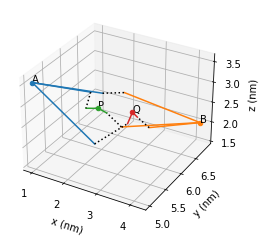

0

In [7]:
io.real_PDB_show_3D(Result=result2)

### 2.5 Calculate Associate Angle

This function will calculate the 5 associating angles of each pair of interfaces. The default normal vector will be assigned as (0, 0, 1). If the co-linear issue occurs, the system will use (0, 1, 0) instead to resolve co-linear issue. The calculated 5 angles will be shown on the screen automatically. If user intends to manually input the normal vector, please refer to function ‘real_PDB_UI’, the separated function does not support manual inputs. The returns will contain all the information for further analysis.

In [8]:
result3 = io.real_PDB_separate_angle(Result=result2)

Angles for chain A & B
Theta1: 2.583, Theta2: 2.733, Phi1: -2.285, Phi2: 1.340, Omega: 1.175
Angles for chain A & P
Theta1: 1.738, Theta2: 1.709, Phi1: -1.533, Phi2: -1.635, Omega: -2.999
Angles for chain A & Q
Theta1: 1.745, Theta2: 2.253, Phi1: -3.041, Phi2: 2.156, Omega: 0.341
Angles for chain B & P
Theta1: 2.130, Theta2: 2.943, Phi1: -1.823, Phi2: -0.469, Omega: 1.817
Angles for chain B & Q
Theta1: 2.483, Theta2: 1.775, Phi1: -1.873, Phi2: -1.624, Omega: -1.870


### 2.6 Normalizing COM

This function will normalize the COM of each chain as (0, 0, 0). The interface of each chain will be subtracted by the COM coordinates accordingly. Once the calculation is completed, there will be message shown on the screen. The returns will contain all the information for further analysis.

In [9]:
result4 = io.real_PDB_separate_COM(Result=result3)

COM is normalized as [0.000, 0.000, 0.000]


### 2.7 Writing Files

This function will write ‘.inp’ and ‘.mol’ files according to all the calculations and modifications above. Multiple ‘.mol’ file and a ‘.inp’ file can be found in the same directory as the Jupyter Notebook file once the function finish running.

In [10]:
io.real_PDB_separate_write(Result=result4)

Input files written complete.


0

## 3. Simulation

To run the simulation, copy the 'nerdss.exe' file generated in the first step in the same directory as .inp and .mol file. Open the same directory in terminal and run command below in system command line to start simulation:

> ./nerdss -f parm.inp